In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

,Ticket Id,Ticket Type,Team,Platform,Team Size,Client Name,Vertical,Breached
0,305350,Reporting,Team O,P2,12,Cust-1,BFSI,0
1,305351,Reporting,Team O,P2,12,Cust-2,BFSI,0
2,305352,Reporting,Team O,P2,12,Cust-3,BFSI,0
3,305353,Analysis,Team O,P2,12,Cust-4,BFSI,0
4,305354,Analysis,Team O,P2,12,Cust-5,BFSI,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12370 entries, 0 to 12369
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ticket Id    12370 non-null  int64 
 1   Ticket Type  12370 non-null  object
 2   Team         12370 non-null  object
 3   Platform     12370 non-null  object
 4   Team Size    12370 non-null  int64 
 5   Client Name  12370 non-null  object
 6   Vertical     12370 non-null  object
 7   Breached     12370 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 773.2+ KB


In [ ]:
df.nunique()

Ticket Id      12370
Ticket Type        6
Team               7
Platform           3
Team Size          6
Client Name       30
Vertical           7
Breached           2
dtype: int64

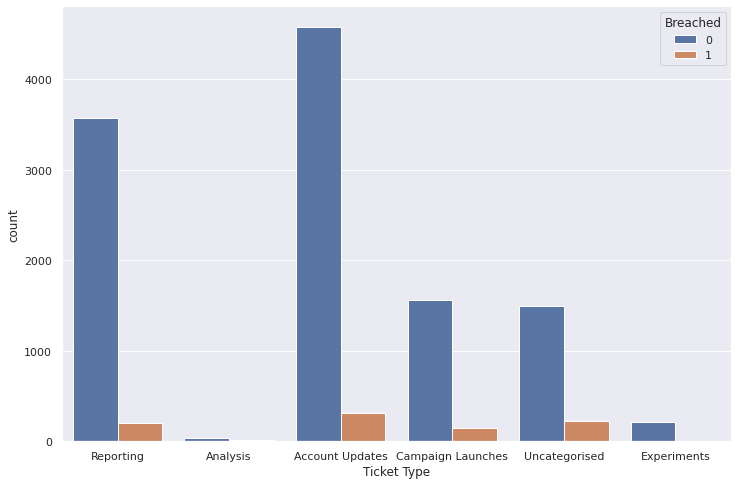

In [ ]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Ticket Type', hue = 'Breached', data = df, ax = ax)

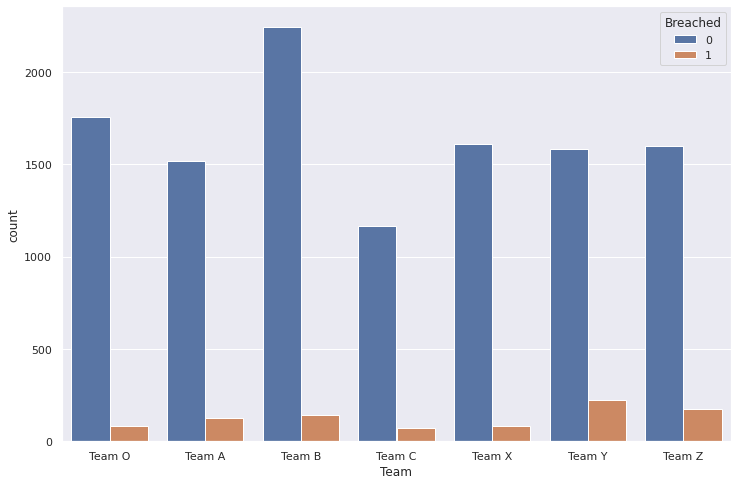

In [ ]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Team', hue = 'Breached', data = df, ax = ax)

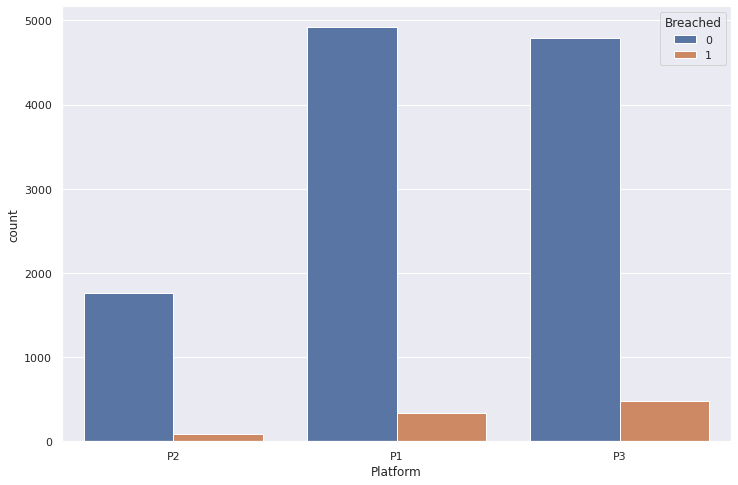

In [ ]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Platform', hue = 'Breached', data = df, ax = ax)

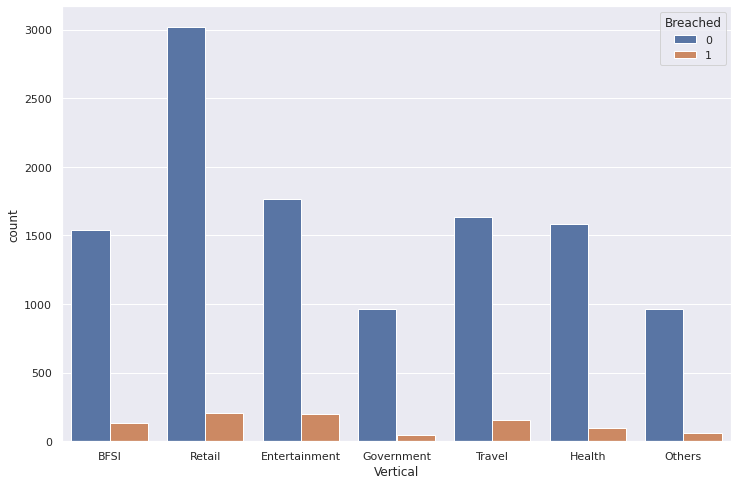

In [ ]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Vertical', hue = 'Breached', data = df, ax = ax)

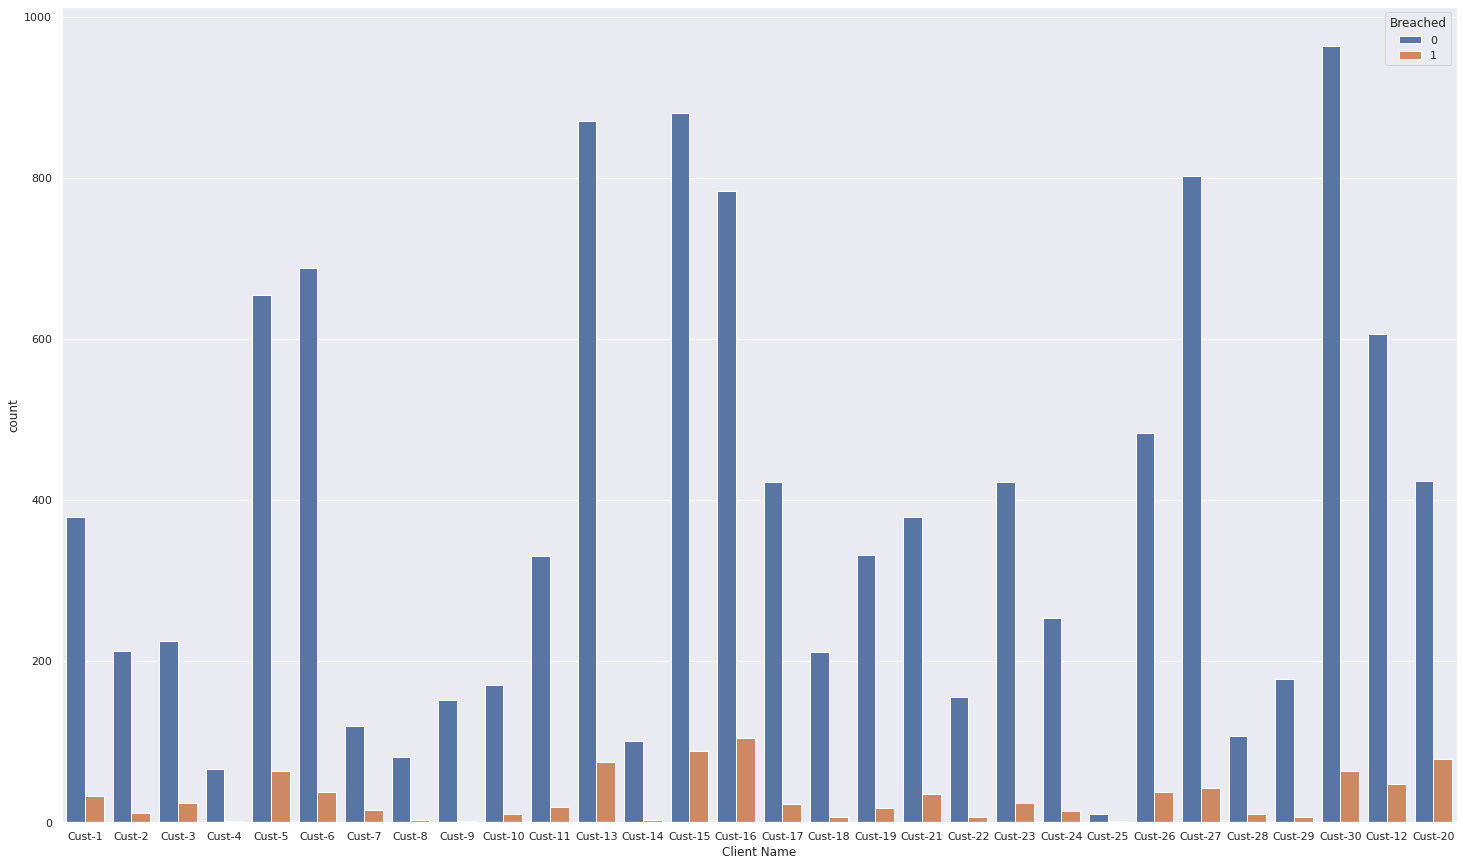

In [ ]:
fig_dims = (25,15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Client Name', hue = 'Breached', data = df, ax = ax)

In [ ]:
df.head()

,Ticket Id,Ticket Type,Team,Platform,Team Size,Client Name,Vertical,Breached
0,305350,Reporting,Team O,P2,12,Cust-1,BFSI,0
1,305351,Reporting,Team O,P2,12,Cust-2,BFSI,0
2,305352,Reporting,Team O,P2,12,Cust-3,BFSI,0
3,305353,Analysis,Team O,P2,12,Cust-4,BFSI,0
4,305354,Analysis,Team O,P2,12,Cust-5,BFSI,0


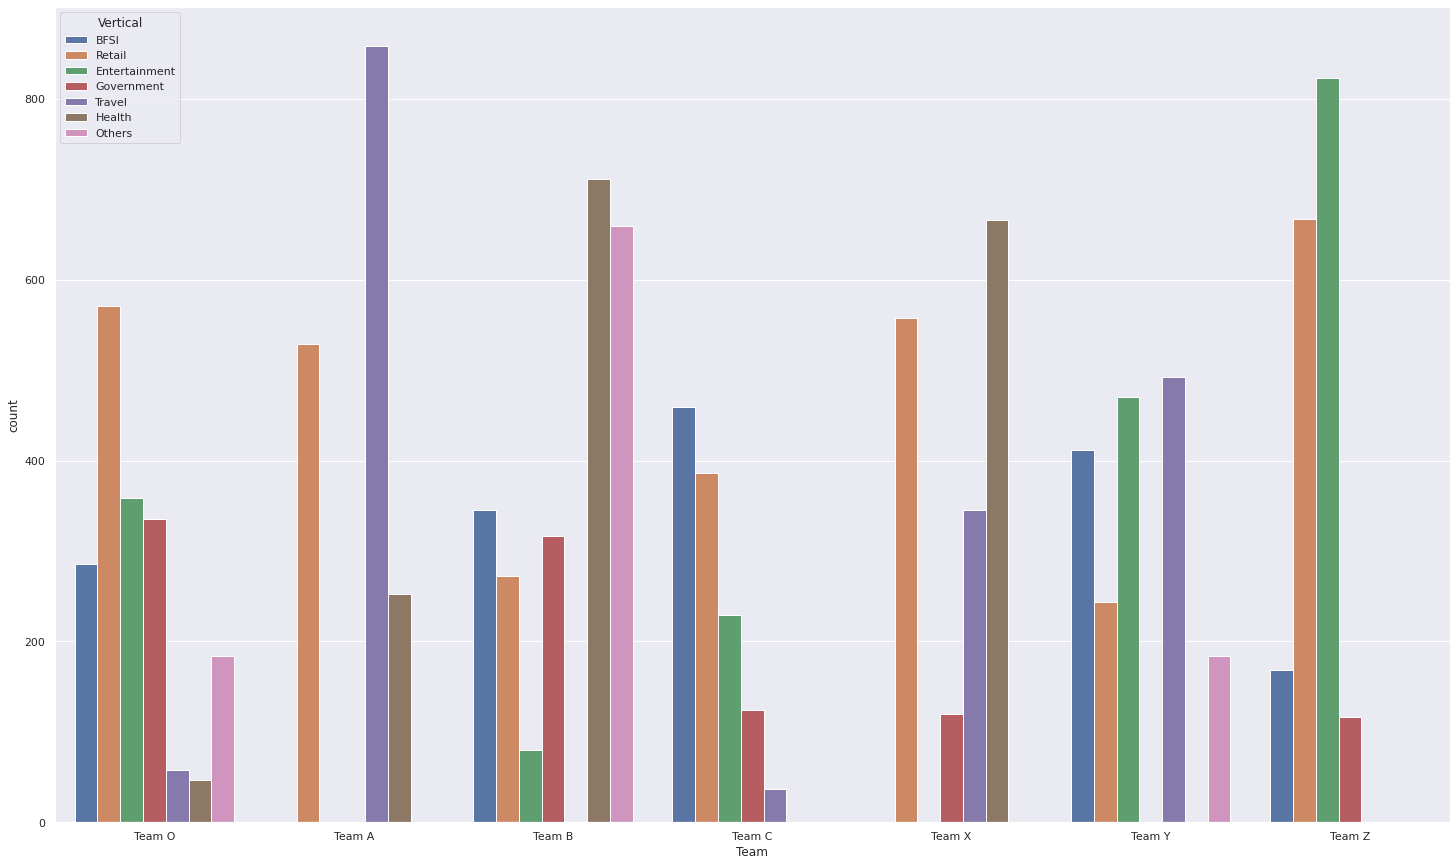

In [ ]:
fig_dims = (25,15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Team', hue = 'Vertical', data = df, ax = ax)

In [ ]:
df.columns

Index(['Ticket Id', 'Ticket Type', 'Team', 'Platform', 'Team Size',
       'Client Name', 'Vertical', 'Breached'],
      dtype='object')

In [ ]:
new_df = df.copy()
# Categorical boolean mask
categorical_feature_mask = new_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = new_df.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
new_df[categorical_cols] = new_df[categorical_cols].apply(lambda col: le.fit_transform(col))
new_df[categorical_cols].head(10)

,Ticket Type,Team,Platform,Client Name,Vertical
0,4,3,1,0,0
1,4,3,1,11,0
2,4,3,1,22,0
3,1,3,1,24,0
4,1,3,1,25,0
5,1,3,1,25,0
6,1,3,1,26,5
7,1,3,1,27,5
8,0,3,1,28,5
9,0,3,1,28,5


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(new_df)

,variables,VIF
0,Ticket Id,50.996051
1,Ticket Type,2.333798
2,Team,36.109566
3,Platform,22.836733
4,Team Size,37.767303
5,Client Name,4.826293
6,Vertical,4.260410
7,Breached,1.087973


In [ ]:
B = new_df.drop(columns = ['Ticket Id', 'Platform', 'Breached', 'Team Size'])

In [ ]:
calc_vif(B)

,variables,VIF
0,Ticket Type,2.180348
1,Team,2.058810
2,Client Name,2.443539
3,Vertical,2.598009


In [ ]:
C = new_df.drop(columns = ['Ticket Id', 'Team Size'])

In [ ]:
calc_vif(C)

,variables,VIF
0,Ticket Type,2.192574
1,Team,16.783932
2,Platform,14.645260
3,Client Name,2.471226
4,Vertical,2.601699
5,Breached,1.080638


In [ ]:
df.head()

,Ticket Id,Ticket Type,Team,Platform,Team Size,Client Name,Vertical,Breached
0,305350,Reporting,Team O,P2,12,Cust-1,BFSI,0
1,305351,Reporting,Team O,P2,12,Cust-2,BFSI,0
2,305352,Reporting,Team O,P2,12,Cust-3,BFSI,0
3,305353,Analysis,Team O,P2,12,Cust-4,BFSI,0
4,305354,Analysis,Team O,P2,12,Cust-5,BFSI,0


In [ ]:
df1 = df.drop(columns = ['Ticket Id', 'Platform', 'Team Size'])
df_new= pd.get_dummies(df1, drop_first= True)
df_new

,Breached,Ticket Type_Analysis,Ticket Type_Campaign Launches,Ticket Type_Experiments,Ticket Type_Reporting,Ticket Type_Uncategorised,Team_Team B,Team_Team C,Team_Team O,Team_Team X,Team_Team Y,Team_Team Z,Client Name_Cust-10,Client Name_Cust-11,Client Name_Cust-12,Client Name_Cust-13,Client Name_Cust-14,Client Name_Cust-15,Client Name_Cust-16,Client Name_Cust-17,Client Name_Cust-18,Client Name_Cust-19,Client Name_Cust-2,Client Name_Cust-20,Client Name_Cust-21,Client Name_Cust-22,Client Name_Cust-23,Client Name_Cust-24,Client Name_Cust-25,Client Name_Cust-26,Client Name_Cust-27,Client Name_Cust-28,Client Name_Cust-29,Client Name_Cust-3,Client Name_Cust-30,Client Name_Cust-4,Client Name_Cust-5,Client Name_Cust-6,Client Name_Cust-7,Client Name_Cust-8,Client Name_Cust-9,Vertical_Entertainment,Vertical_Government,Vertical_Health,Vertical_Others,Vertical_Retail,Vertical_Travel
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12365,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12366,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12368,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X=df_new.drop(columns=['Breached'])
y=df_new['Breached']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ors=RandomOverSampler(ratio=1)
X_train_res,y_train_res=ors.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_res.shape,y_train_res.shape

((22930, 46), (22930,))

In [ ]:
from collections import Counter
print('original dataset shape {}'.format(Counter(y)))
print('resampled dataset shape {}'.format(Counter(y_train_res)))

original dataset shape Counter({0: 11465, 1: 905})
resampled dataset shape Counter({0: 11465, 1: 11465})


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train_res,y_train_res,test_size=0.30,random_state=101)

In [ ]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#Automating the accuracy scores by defining a function
def CrossVal(dataX,dataY,mode,cv=3):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))

In [ ]:
#Automating Precision curve, AUC, ROC under a function
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')



Accuracy is :  0.5843250424557439


Text(0.5, 1.0, 'F1 Score = 0.5772646536412078')

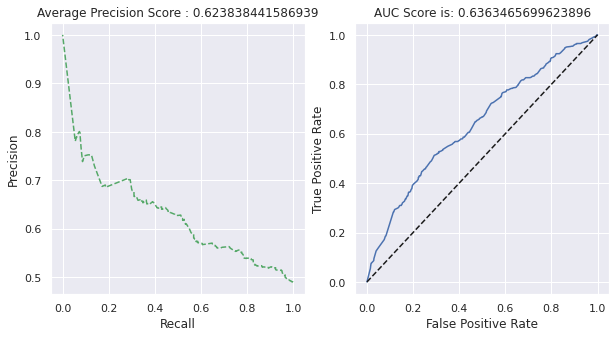

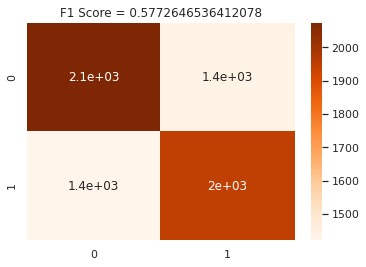

In [ ]:
sgd=SGDClassifier(tol=1e-10, random_state=23,loss='log', penalty= "l2", alpha=0.2)
score_sgd=CrossVal(X_train,y_train,sgd)
print("Accuracy is : ",score_sgd)
sgd.fit(X_train,y_train)
plotting(y_test,sgd.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,sgd.predict(X_test)), annot= True, cmap='Oranges')
sgd_f1=f1_score(y_test,sgd.predict(X_test))
plt.title('F1 Score = {}'.format(sgd_f1))

Accuracy is :  0.6057565040103722


Text(0.5, 1.0, 'F1 Score = 0.646415897799858')

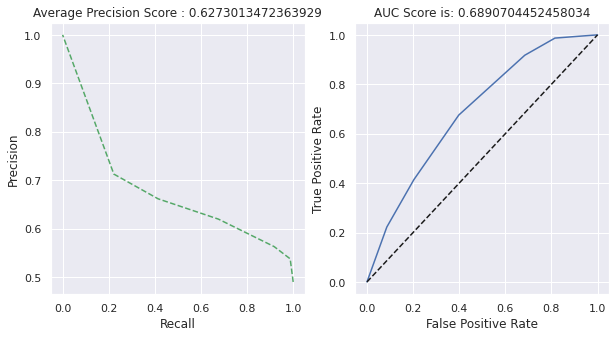

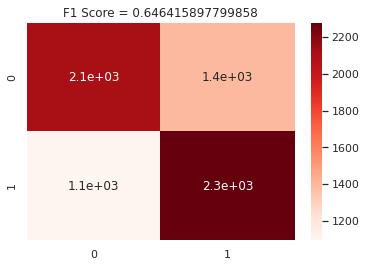

In [ ]:
k=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
score_k=CrossVal(X_train,y_train,k)
print("Accuracy is : ",score_k)
k.fit(X_train,y_train)
plotting(y_test,k.predict_proba(X_test))


fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,k.predict(X_test)), annot= True, cmap='Reds')
k_f1=f1_score(y_test,k.predict(X_test))
plt.title('F1 Score = {}'.format(k_f1))

Accuracy is :  0.6040747616976708


Text(0.5, 1.0, 'F1 Score = 0.5869432580841977')

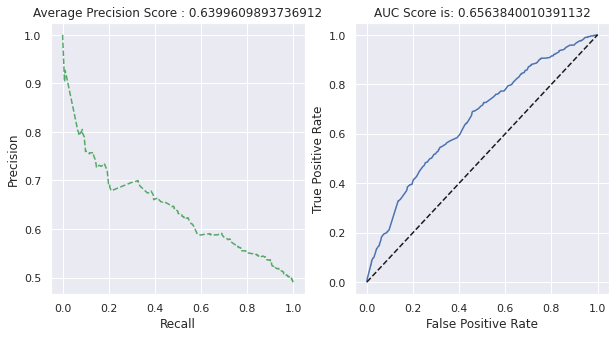

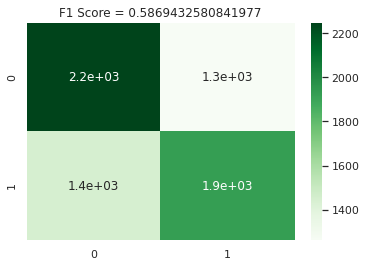

In [ ]:
lr=LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
score_lr=CrossVal(X_train,y_train,lr)
print("Accuracy is : ",score_lr)
lr.fit(X_train,y_train)
plotting(y_test,lr.predict_proba(X_test))


fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,lr.predict(X_test)), annot= True, cmap='Greens')
lr_f1=f1_score(y_test,lr.predict(X_test))
plt.title('F1 Score = {}'.format(lr_f1))

Accuracy is :  0.6701139857399934


Text(0.5, 1.0, 'F1 Score = 0.6843539366126488')

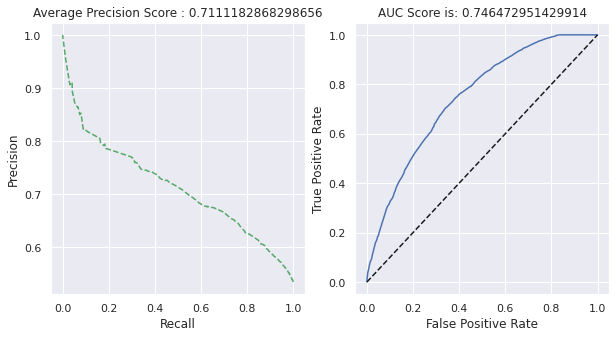

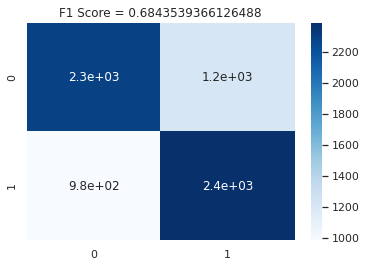

In [ ]:
dtc=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
score_dtc=CrossVal(X_train,y_train,dtc)
print("Accuracy is : ",score_dtc)
dtc.fit(X_train,y_train)
plotting(y_test,dtc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,dtc.predict(X_test)), annot= True, cmap='Blues')

dtc_f1=f1_score(y_test,dtc.predict(X_test))
plt.title('F1 Score = {}'.format(dtc_f1))

Accuracy is: 0.6399602950739695


Text(0.5, 1.0, 'F1 Score = 0.6315000749288177')

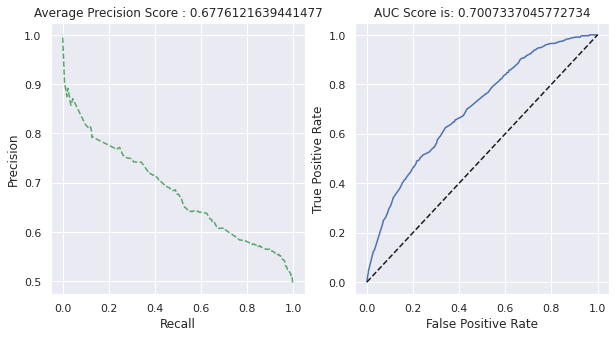

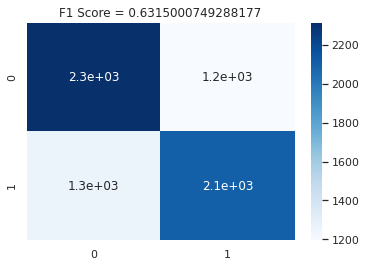

In [ ]:
gbc=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
score_gbc= CrossVal(X_train,y_train,gbc)
print('Accuracy is:',score_gbc)
gbc.fit(X_train,y_train)
plotting(y_test,gbc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,gbc.predict(X_test)), annot= True, cmap='Blues')

gbc_f1=f1_score(y_test,gbc.predict(X_test))
plt.title('F1 Score = {}'.format(gbc_f1))

Accuracy is: 0.6399602950739695


Text(0.5, 1.0, 'F1 Score = 0.6858451409760984')

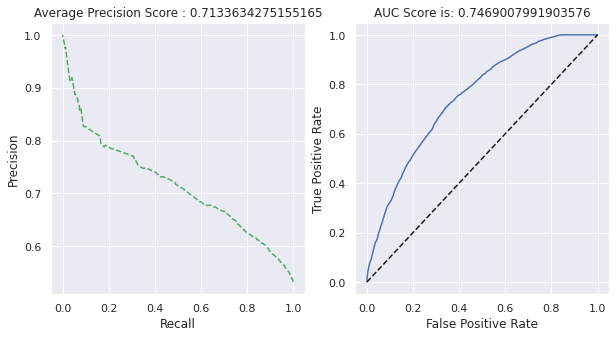

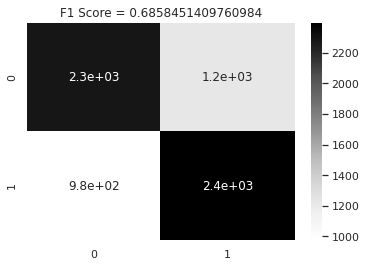

In [ ]:
bc=BaggingClassifier(base_estimator= DecisionTreeClassifier(), n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
score_bc= CrossVal(X_train,y_train,gbc)
print('Accuracy is:',score_bc)
bc.fit(X_train,y_train)
plotting(y_test,bc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,bc.predict(X_test)), annot= True, cmap='Greys')

bc_f1=f1_score(y_test,bc.predict(X_test))
plt.title('F1 Score = {}'.format(bc_f1))

Accuracy is: 0.6602082820283978


Text(0.5, 1.0, 'F1 Score = 0.6756232686980609')

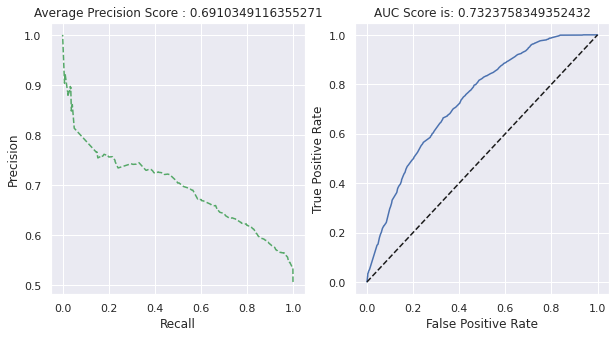

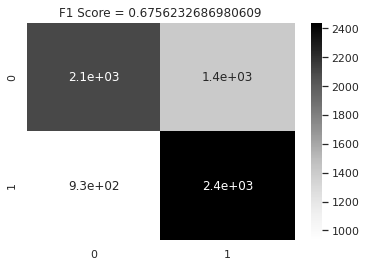

In [ ]:
vc=VotingClassifier(estimators=[('knn',k),('lr',lr),('dtc',dtc)],
                    voting='soft')
score_vc= CrossVal(X_train,y_train,vc)
print('Accuracy is:',score_vc)
vc.fit(X_train,y_train)
plotting(y_test,vc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,vc.predict(X_test)), annot= True, cmap='Greys')

vc_f1=f1_score(y_test,vc.predict(X_test))
plt.title('F1 Score = {}'.format(vc_f1))

     |████████████████████████████████| 66.1MB 57kB/s 
Learning rate set to 0.028345
0:	learn: 0.6912382	total: 53.8ms	remaining: 53.7s
1:	learn: 0.6889619	total: 61.9ms	remaining: 30.9s
2:	learn: 0.6871213	total: 71.9ms	remaining: 23.9s
3:	learn: 0.6858299	total: 77.1ms	remaining: 19.2s
4:	learn: 0.6840160	total: 85.1ms	remaining: 16.9s
5:	learn: 0.6825926	total: 93.3ms	remaining: 15.5s
6:	learn: 0.6809120	total: 101ms	remaining: 14.3s
7:	learn: 0.6791661	total: 109ms	remaining: 13.5s
8:	learn: 0.6774968	total: 117ms	remaining: 12.9s
9:	learn: 0.6762082	total: 126ms	remaining: 12.4s
10:	learn: 0.6747776	total: 132ms	remaining: 11.9s
11:	learn: 0.6733143	total: 140ms	remaining: 11.5s
12:	learn: 0.6719469	total: 147ms	remaining: 11.2s
13:	learn: 0.6707257	total: 155ms	remaining: 10.9s
14:	learn: 0.6696116	total: 162ms	remaining: 10.7s
15:	learn: 0.6685203	total: 170ms	remaining: 10.4s
16:	learn: 0.6670408	total: 177ms	remaining: 10.3s
17:	learn: 0.6660748	total: 185ms	remaining: 10.1s
1

Text(0.5, 1.0, 'F1 Score = 0.6836499712147381')

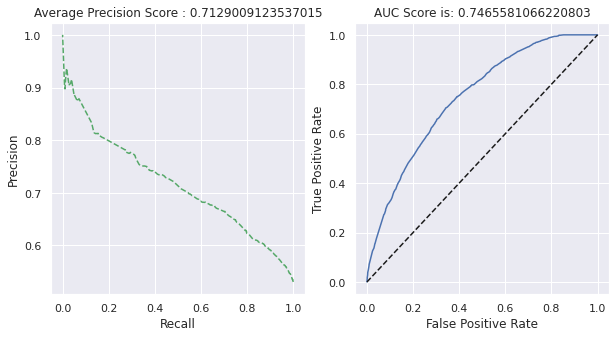

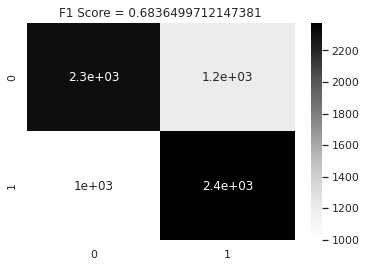

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier, Pool
cat=CatBoostClassifier()
score_cat= CrossVal(X_train,y_train,cat)
print('Accuracy is:',score_cat)
cat.fit(X_train,y_train)
plotting(y_test,cat.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,cat.predict(X_test)), annot= True, cmap='Greys')

cat_f1=f1_score(y_test,cat.predict(X_test))
plt.title('F1 Score = {}'.format(cat_f1))

Accuracy is: 0.6689927465737036


Text(0.5, 1.0, 'F1 Score = 0.675120244862265')

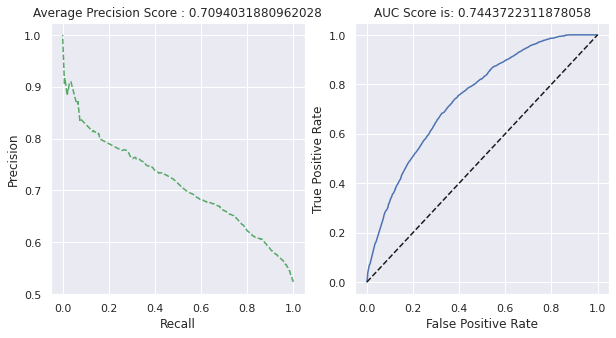

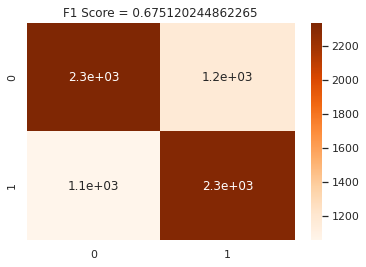

In [ ]:
rf=RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=110, min_samples_split=8, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
score_rf= CrossVal(X_train,y_train,rf)
print('Accuracy is:',score_rf)
rf.fit(X_train,y_train)
plotting(y_test,rf.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,rf.predict(X_test)), annot= True, cmap='Oranges')

rf_f1=f1_score(y_test,rf.predict(X_test))
plt.title('F1 Score = {}'.format(rf_f1))

Accuracy is: 0.6712977281446797


Text(0.5, 1.0, 'F1 Score = 0.6849433041481269')

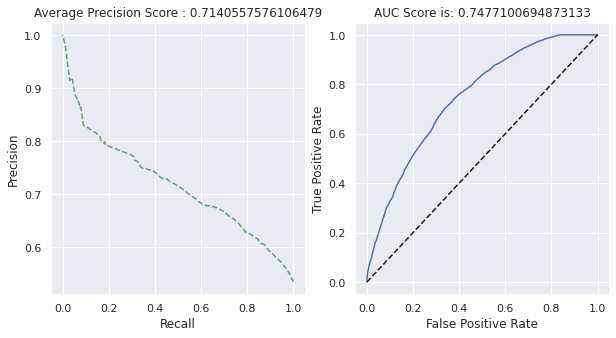

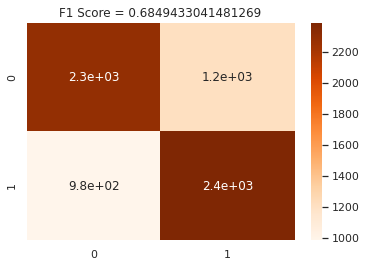

In [ ]:
etc=ExtraTreesClassifier(bootstrap= False, ccp_alpha=0, class_weight= None, criterion= 'gini', max_depth= None, max_features='auto', min_impurity_decrease= 0.0, min_impurity_split= None, min_weight_fraction_leaf=0, n_estimators=100, n_jobs=-1, oob_score= False, random_state=123, verbose=0, warm_start=False)
score_etc= CrossVal(X_train,y_train,etc)
print('Accuracy is:',score_etc)
etc.fit(X_train,y_train)
plotting(y_test,etc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,etc.predict(X_test)), annot= True, cmap='Oranges')

etc_f1=f1_score(y_test,etc.predict(X_test))
plt.title('F1 Score = {}'.format(etc_f1))

Accuracy is: 0.632297279281073


Text(0.5, 1.0, 'F1 Score = 0.6125076640098099')

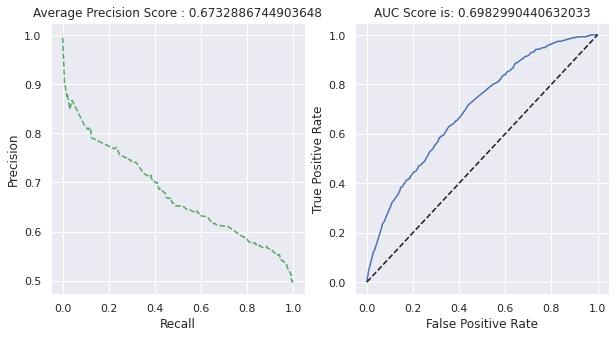

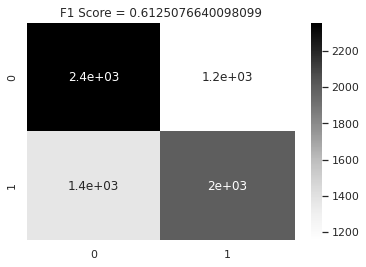

In [ ]:
import xgboost as xgb
xb = xgb.XGBClassifier(base_estimator = RandomForestClassifier(), random_state=0)
score_xb= CrossVal(X_train,y_train,xb)
print('Accuracy is:',score_xb)
xb.fit(X_train,y_train)
plotting(y_test,xb.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,xb.predict(X_test)), annot= True, cmap='Greys')

xb_f1=f1_score(y_test,xb.predict(X_test))
plt.title('F1 Score = {}'.format(xb_f1))

Accuracy is: 0.671297669926313


Text(0.5, 1.0, 'F1 Score = 0.689703808180536')

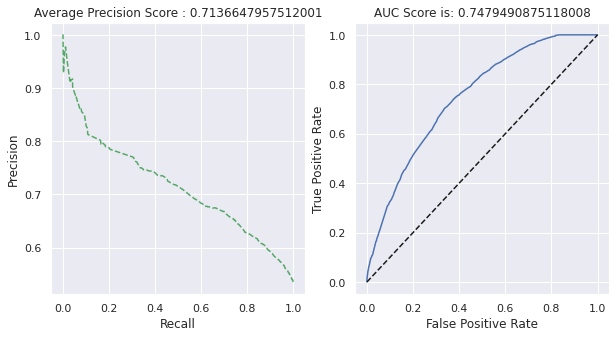

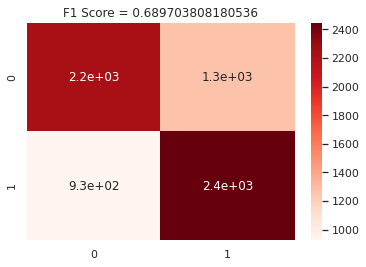

In [ ]:
abc=AdaBoostClassifier(RandomForestClassifier(),n_estimators=100, random_state=343, learning_rate=1)
score_ada= CrossVal(X_train,y_train,abc)
print('Accuracy is:',score_ada)
abc.fit(X_train,y_train)
plotting(y_test,abc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,abc.predict(X_test)), annot= True, cmap='Reds')

abc_f1=f1_score(y_test,abc.predict(X_test))
plt.title('F1 Score = {}'.format(abc_f1))

In [ ]:
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()
pycaret_data=pd.read_csv('/content/data.csv')
from pycaret.classification import *
exp_clf101 = setup(data = pycaret_data, target = 'Breached', session_id=123)
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9656,0.9642,0.6479,0.8453,0.7321,0.7142,0.7221,4.2792
1,Light Gradient Boosting Machine,0.9640,0.9661,0.6668,0.8064,0.7285,0.7095,0.7139,0.1466
2,Decision Tree Classifier,0.9617,0.8622,0.7456,0.7377,0.7385,0.7179,0.7197,0.0387
3,Extreme Gradient Boosting,0.9600,0.9622,0.5468,0.8612,0.6655,0.6455,0.6660,0.9027
4,Gradient Boosting Classifier,0.9598,0.9616,0.5388,0.8638,0.6606,0.6406,0.6623,1.2616
5,K Neighbors Classifier,0.9596,0.9181,0.6257,0.7807,0.6918,0.6706,0.6768,0.0628
6,Random Forest Classifier,0.9588,0.9061,0.6303,0.7712,0.6909,0.6691,0.6745,0.1112
7,Extra Trees Classifier,0.9510,0.8986,0.6444,0.6747,0.6575,0.6312,0.6324,0.6524
8,Ada Boost Classifier,0.9496,0.9470,0.3856,0.8478,0.5264,0.5039,0.5495,0.5253
9,Logistic Regression,0.9269,0.3053,0.0000,0.0000,0.0000,0.0000,0.0000,0.0362
